# Expected Score Model - Standardising x,y Coordinates to Venues

In [1]:
import sys
sys.path.append("/Users/ciaran/Documents/Projects/AFL/git-repositories/expected-score-model/")

In [2]:
import pandas as pd
import numpy as np
import sympy as sym
from mplfooty.pitch import Pitch

import sys
sys.path.append("..")
from expected_score_model.config import raw_data_file_path

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

Import data

In [3]:
chain_data = pd.read_csv(raw_data_file_path, low_memory=False)
chain_data.head()

,Chain_Number,Initial_State,Final_State,Order,Quarter,Quarter_Duration_Chain_Start,Quarter_Duration,Team_Chain,Team,Player,AFL_API_Player_ID,Description,x,y,Disposal,Shot_At_Goal,Behind_Detail,Venue_Width,Venue_Length,Home_Team,Away_Team,Home_Team_Direction_Q1,Match_ID,Round_ID,Year
0,1,centreBounce,goal,1.0,1,13,13.0,Brisbane Lions,NaN,NaN,NaN,Centre Bounce,0.0,0.0,NaN,NaN,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021
1,1,centreBounce,goal,2.0,1,13,24.0,Brisbane Lions,Brisbane Lions,Dayne Zorko,Dayne_Zorko,Hard Ball Get,8.0,-5.0,NaN,NaN,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021
2,1,centreBounce,goal,3.0,1,13,24.0,Brisbane Lions,Brisbane Lions,Dayne Zorko,Dayne_Zorko,Handball,9.0,-6.0,ineffective,NaN,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021
3,1,centreBounce,goal,4.0,1,13,28.0,Brisbane Lions,Sydney,Oliver Florent,Oliver_Florent,Loose Ball Get,11.0,-7.0,NaN,NaN,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021
4,1,centreBounce,goal,5.0,1,13,29.0,Brisbane Lions,Sydney,Oliver Florent,Oliver_Florent,Handball,12.0,-5.0,effective,NaN,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021


In [5]:
def plot_match_events(chain_data, match_id, event, home_colour="blue", away_colour = "red"):
    
    # Get match chain information
    match = chain_data[chain_data['Match_ID'] == match_id]
 
    # Get teams
    home_team = list(set(match['Home_Team']))[0]
    away_team = list(set(match['Away_Team']))[0]
    
    # Get pitch dimensions
    match_pitch_length = list(set(match['Venue_Length']))[0]
    match_pitch_width = list(set(match['Venue_Width']))[0]
    # Plot pitch
    pitch = Pitch(pitch_width=match_pitch_width, pitch_length=match_pitch_length)
    fig, ax = pitch.draw()
       
    # Filter event
    if event == "Shot":
        match_events = match[match['Shot_At_Goal'] == True]
    else:
        match_events = match[match['Description'] == event]
    
    # Plot home shots
    x_home = match_events[match_events['Team'] == home_team]['x']
    y_home = match_events[match_events['Team'] == home_team]['y']
    pitch.scatter(x_home, y_home, ax=ax, color = home_colour)
    # Plot away shots
    x_away = -1*match_events[match_events['Team'] == away_team]['x']
    y_away = -1*match_events[match_events['Team'] == away_team]['y']
    pitch.scatter(x_away, y_away, ax=ax, color = away_colour)
    
    return fig, ax

Match Shots - Venue - Works Great

(<Figure size 640x480 with 1 Axes>, <Axes: >)

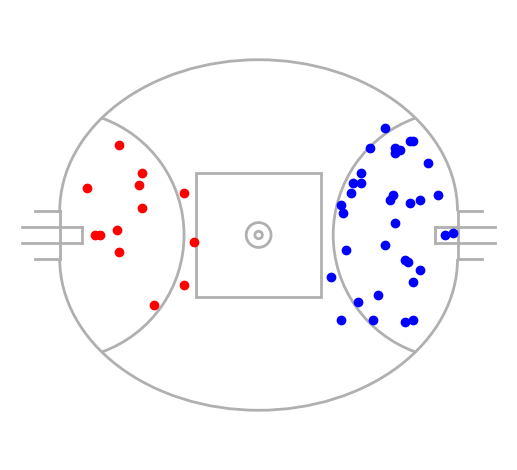

In [6]:
MCG_match = "2022F4_Geelong_Sydney"
plot_match_events(chain_data, match_id = MCG_match, event = "Shot", home_colour="blue", away_colour="red")

Plotting Multiple Venues on Same Pitch

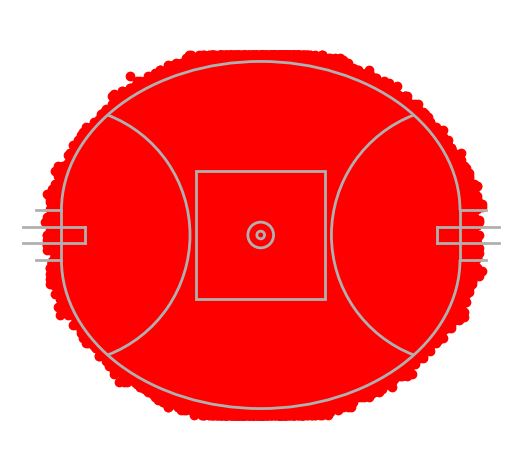

In [7]:
# Plot pitch
pitch = Pitch(pitch_width=135, pitch_length=155, line_zorder=2)
fig, ax = pitch.draw()
pitch.scatter(chain_data['x'],chain_data['y'], ax=ax, color = 'red')

Pitch Dimensions - Pitch From to Pitch To

In [31]:
pitch_length_from = 150
pitch_width_from = 130
pitch_from = Pitch(pitch_width=pitch_width_from, pitch_length=pitch_length_from, axis=True, label=True, tick=True)

pitch_length_to = 170
pitch_width_to = 120
pitch_to = Pitch(pitch_width=pitch_width_to, pitch_length=pitch_length_to, axis=True, label=True, tick=True)


In [32]:
x = 50
y = 30

Centre Square = No Standardising

In [61]:
x_from=10
y_from=10

In [62]:
square50_top = pitch_from.dim.centre_square/2
square50_bottom = -pitch_from.dim.centre_square/2
square50_left = -pitch_from.dim.centre_square/2
square50_right = pitch_from.dim.centre_square/2

if ((x_from < square50_right) & (x_from > square50_left) & (y_from < square50_top) & (y_from > square50_bottom)):
    x_to = x_from
    y_to = y_from
    

In [63]:
x_from, y_from, x_to, y_to

(10, 10, 10, 10)

Goal Square = Same y Coordinate, Ensure Same x Coordinate to Goal

In [64]:
x_from = pitch_from.dim.pitch_length / 2 - 5
y_from = 0

In [70]:
goal_square_top_from = pitch_from.dim.goal_top
goal_square_bottom_from = pitch_from.dim.goal_bottom
goal_square_right_from = pitch_from.dim.pitch_length/2
goal_square_left_from = goal_square_right_from - pitch_from.dim.goal_square_length

goal_square_top_to = pitch_to.dim.goal_top
goal_square_bottom_to = pitch_to.dim.goal_bottom
goal_square_right_to = pitch_to.dim.pitch_length/2
goal_square_left_to = goal_square_right_to - pitch_to.dim.goal_square_length

if ((x_from < goal_square_right_from) & (x_from > goal_square_left_from) & (y_from < goal_square_top_from) & (y_from > goal_square_bottom_from)):
    x_to_goal_from = goal_square_right_from - x_from
    x_to = goal_square_right_to - x_to_goal_from
    y_to = y_from

In [73]:
x_from, y_from, x_to, y_to

(70.0, 0, 80.0, 0)

Within Behind Lines = Scale x coordinates linearly, y coordinates remain the same

In [74]:
x_from = 27
y_from = 0

In [76]:
behind_line_top_from = pitch_from.dim.behind_top
behind_line_bottom_from = pitch_from.dim.behind_bottom
behind_line_right_from = pitch_from.dim.pitch_length/2
behind_line_left_from = -pitch_from.dim.pitch_length/2

behind_line_top_to = pitch_to.dim.behind_top
behind_line_bottom_to = pitch_to.dim.behind_bottom
behind_line_right_to = pitch_to.dim.pitch_length/2
behind_line_left_to = -pitch_to.dim.pitch_length/2

if ((x_from < behind_line_right_from) & (x_from > behind_line_left_from) & (y_from < behind_line_top_from) & (y_from > behind_line_bottom_from)):

    behind_line_right_ratio = behind_line_right_to / behind_line_right_from
    
    x_to = x_from * behind_line_right_ratio
    y_to = y_from

In [77]:
x_from, y_from, x_to, y_to

(27, 0, 30.599999999999998, 0)

Within Inside50 = Maintain Angle to Centre of Goal, Maintain Distance to Centre of Goal

In [84]:
x_from = 50
y_from = 30

[5.40712726] [39.05124838]
[5.57455904] [46.09772229]


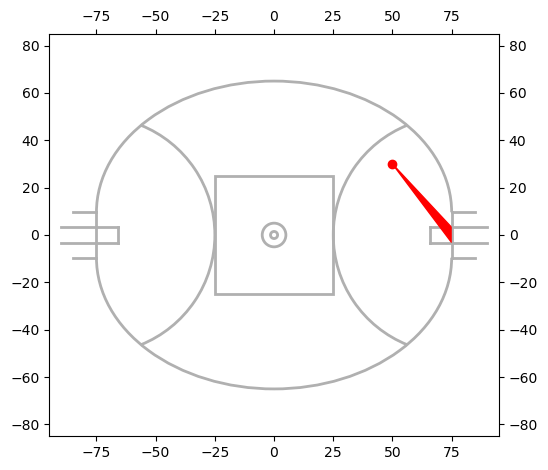

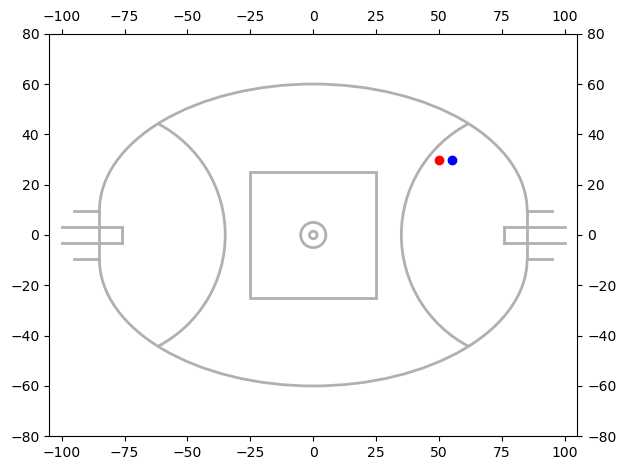

In [90]:
# Plot pitch
fig, ax = pitch_from.draw()
pitch_from.scatter(x_from,y_from, ax=ax, color = 'red')
pitch_from.goal_angle(x_from, y_from, ax=ax, color = "red")
angle_from, distance_from = pitch_from.calculate_angle_and_distance(x_from,y_from, pitch_from.dim.right, 0)
print(angle_from, distance_from)

x_to = 55 # x location where angle=angle_from and distance = distance_from
y_to = 30 # y location where angle=angle_from and distance = distance_from

fig, ax = pitch_to.draw()
pitch_to.scatter(x_from,y_from, ax=ax, color = 'red')
pitch_to.scatter(x_to,y_to, ax=ax, color = 'blue')
angle_to, distance_to = pitch_to.calculate_angle_and_distance(x_from,y_from, pitch_to.dim.right, 0)
print(angle_to, distance_to)

[5.40712726] [39.05124838]
60.0000000000000 30.0000000000000
[5.40712726] [39.05124838]


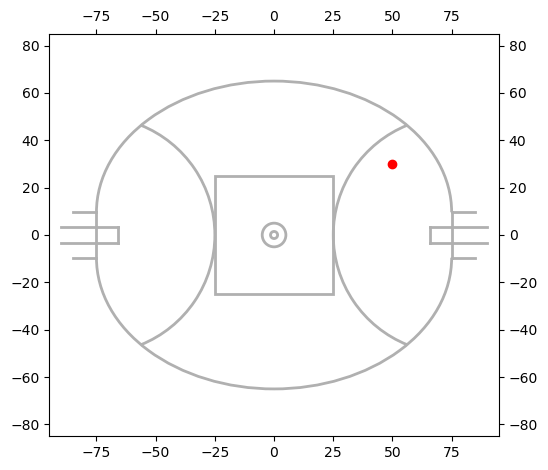

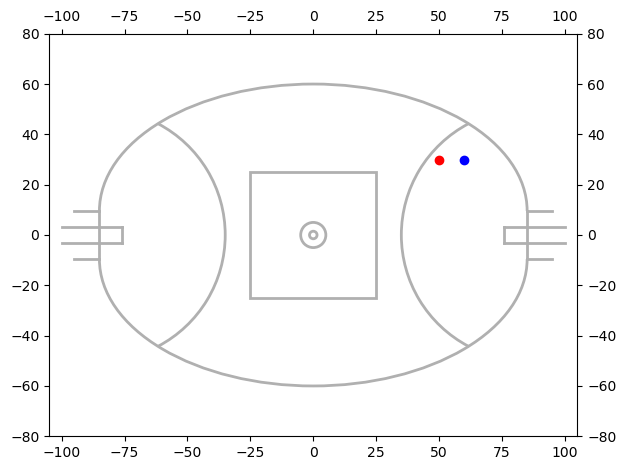

In [114]:
fig, ax = pitch_from.draw()
pitch_from.scatter(x_from,y_from, ax=ax, color = 'red')
angle_from, distance_from = pitch_to.calculate_angle_and_distance(x_from,y_from, pitch_from.dim.right, 0)
print(angle_from, distance_from)

x,y = sym.symbols('x,y')
eq1 = sym.Eq(y/(x-pitch_to.dim.right),np.tan(angle_from)[0])
eq2 = sym.Eq(((x-pitch_to.dim.right)**2+y**2)**0.5,distance_from[0])
result = sym.solve([eq1,eq2],(x,y))
x_to = result[0][0]
y_to = result[0][1]

print(x_to, y_to)

fig, ax = pitch_to.draw()
pitch_to.scatter(x_from,y_from, ax=ax, color = 'red')
pitch_to.scatter(x_to,y_to, ax=ax, color = 'blue')
angle_to, distance_to = pitch_to.calculate_angle_and_distance(np.float64(x_to),np.float64(y_to), pitch_to.dim.right, 0)
print(angle_to, distance_to)

assert np.round(angle_from, 6) == np.round(angle_to, 6)
assert np.round(distance_from, 6) == np.round(distance_to, 6)

In [163]:
x_from = 50
y_from = 30

In [164]:
inside_50_radius = pitch_from.dim.inside_50_radius

inside_50_right_angle_start_from = 180 - pitch_from.dim.inside_50_angle
inside_50_right_angle_end_from = 180 + pitch_from.dim.inside_50_angle
inside_50_left_angle_start_from = 360 - pitch_from.dim.inside_50_angle
inside_50_left_angle_end_from = pitch_from.dim.inside_50_angle

inside_50_right_angle_start_to = 180 - pitch_to.dim.inside_50_angle
inside_50_right_angle_end_to = 180 + pitch_to.dim.inside_50_angle
inside_50_left_angle_start_to = 360 - pitch_to.dim.inside_50_angle
inside_50_left_angle_end_to = pitch_to.dim.inside_50_angle

angle_to_right_goal_from, distance_to_right_goal_from = pitch_from.calculate_angle_and_distance(xstart=np.float64(x_from), ystart=np.float64(y_from), xend=np.float64(pitch_from.dim.right), yend=0)
angle_to_left_goal_from, distance_to_left_goal_from = pitch_from.calculate_angle_and_distance(xstart=np.float64(x_from), ystart=np.float64(y_from), xend=np.float64(pitch_from.dim.left), yend=0)

if distance_to_right_goal_from < 50:
        
    x,y = sym.symbols('x,y')
    eq1 = sym.Eq(y/(x-pitch_to.dim.right),np.tan(angle_from)[0])
    eq2 = sym.Eq(((x-pitch_to.dim.right)**2+y**2)**0.5,distance_from[0])
    result = sym.solve([eq1,eq2],(x,y))
    if np.sign(result[0][0]) == np.sign(x_from):
        x_to = result[0][0]
        y_to = result[0][1]
    else:
        x_to = result[1][0]
        y_to = result[1][1]

if distance_to_left_goal_from < 50:
    
    angle_from, distance_from = pitch_to.calculate_angle_and_distance(x_from,y_from, pitch_from.dim.left, 0)
    
    x,y = sym.symbols('x,y')
    eq1 = sym.Eq(y/(x-pitch_to.dim.left),np.tan(angle_from)[0])
    eq2 = sym.Eq(((x-pitch_to.dim.left)**2+y**2)**0.5,distance_from[0])
    result = sym.solve([eq1,eq2],(x,y))
    if np.sign(result[0][0]) == np.sign(x_from):
        x_to = result[0][0]
        y_to = result[0][1]
    else:
        x_to = result[1][0]
        y_to = result[1][1]
    

In [165]:
x_from, y_from, x_to, y_to

(50, 30, 75.0000000000000, -30.0000000000000)

Top / Bottom Arc (Everywhere Else) = Maintain Angle to Centre of Pitch, Scale Distance to Centre of Pitch Linearly

In [166]:
x_from = 10
y_from = 30

In [210]:
angle_to_right_goal_from, distance_to_right_goal_from = pitch_from.calculate_angle_and_distance(xstart=np.float64(x_from), ystart=np.float64(y_from), xend=np.float64(pitch_from.dim.right), yend=0)
angle_to_left_goal_from, distance_to_left_goal_from = pitch_from.calculate_angle_and_distance(xstart=np.float64(x_from), ystart=np.float64(y_from), xend=np.float64(pitch_from.dim.left), yend=0)

outside_inside50 = (distance_to_right_goal_from[0] > 50) & (distance_to_left_goal_from[0] > 50)

outside_centre_square = ~((x_from < square50_right) & (x_from > square50_left) & (y_from < square50_top) & (y_from > square50_bottom))

angle_to_centre_from, distance_to_centre_from = pitch_from.calculate_angle_and_distance(xstart=np.float64(x_from), ystart=np.float64(y_from), xend=0, yend=0)

if outside_inside50 & outside_centre_square:
    
    from matplotlib import patches
    # FROM
    top_boundary_from = patches.Arc((0, pitch_from.dim.behind_top), 
                                            width=pitch_from.pitch_length, height = pitch_from.dim.boundary_width,
                                            theta1=0, theta2=180)
    top_boundary_from.get_verts()
    vertices = top_boundary_from.get_verts()[:-1]
    interpolated_array = pitch_from.dim.interpolate_points(vertices, 10)
    distance_to_coordinate = [abs((((v[0]-x_from)**2 + (v[1]-y_from)**2)**0.5)) for v in interpolated_array]
    closest_vertex_to_coordinate = interpolated_array[distance_to_coordinate.index(min(distance_to_coordinate))]
    x_boundary_from = closest_vertex_to_coordinate[0]
    y_boundary_from = closest_vertex_to_coordinate[1]

    angle_boundary_from, distance_boundary_from = pitch_from.calculate_angle_and_distance(x_boundary_from, y_boundary_from, 0, 0)

    # TO
    top_boundary_to = patches.Arc((0, pitch_to.dim.behind_top), 
                                            width=pitch_to.pitch_length, height = pitch_to.dim.boundary_width,
                                            theta1=0, theta2=180)
    top_boundary_to.get_verts()
    vertices = top_boundary_to.get_verts()[:-1]
    interpolated_array = pitch_to.dim.interpolate_points(vertices, 10)
    distance_to_coordinate = [abs((((v[0]-x_from)**2 + (v[1]-y_from)**2)**0.5)) for v in interpolated_array]
    closest_vertex_to_coordinate = interpolated_array[distance_to_coordinate.index(min(distance_to_coordinate))]
    x_boundary_to = closest_vertex_to_coordinate[0]
    y_boundary_to = closest_vertex_to_coordinate[1]

    angle_boundary_to, distance_boundary_to = pitch_to.calculate_angle_and_distance(x_boundary_to, y_boundary_to, 0, 0)

    # Scale
    distance_to_centre_to = distance_to_centre_from * (distance_boundary_to / distance_boundary_from)

    x,y = sym.symbols('x,y')
    eq1 = sym.Eq(y/x,np.tan(angle_to_centre_from)[0])
    eq2 = sym.Eq((x**2+y**2)**0.5,distance_to_centre_to[0])
    result = sym.solve([eq1,eq2],(x,y))
    if np.sign(result[0][0]) == np.sign(x_from):
        x_to = result[0][0]
        y_to = result[0][1]
    else:
        x_to = result[1][0]
        y_to = result[1][1]    
    

In [211]:
x_from, y_from, x_to, y_to

(10, 30, 9.25205124359110, 27.7561537307733)

[4.39063843] [31.6227766]
[4.39063843] [29.25755496]


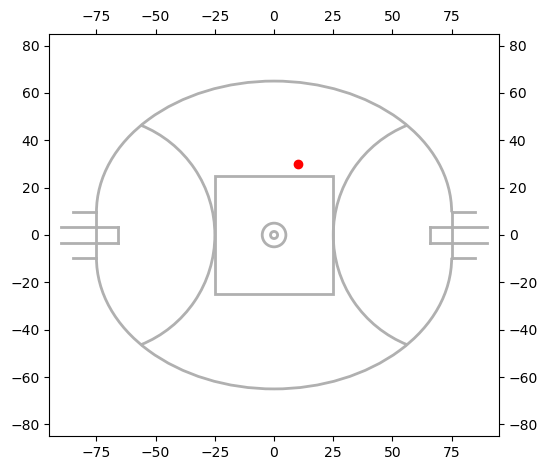

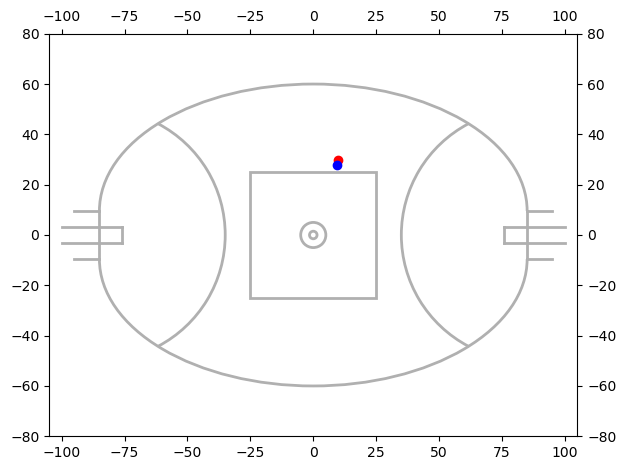

In [213]:
fig, ax = pitch_from.draw()
pitch_from.scatter(x_from,y_from, ax=ax, color = 'red')
angle_from, distance_from = pitch_to.calculate_angle_and_distance(x_from,y_from, 0, 0)
print(angle_from, distance_from)

fig, ax = pitch_to.draw()
pitch_to.scatter(x_from,y_from, ax=ax, color = 'red')
pitch_to.scatter(x_to,y_to, ax=ax, color = 'blue')
angle_to, distance_to = pitch_to.calculate_angle_and_distance(np.float64(x_to),np.float64(y_to), 0, 0)
print(angle_to, distance_to)

assert np.round(angle_from, 6) == np.round(angle_to, 6)
# assert np.round(distance_from, 6) == np.round(distance_to, 6)